In [137]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [138]:
file_path = "laptop_data.csv"
df = pd.read_csv(file_path, encoding="latin1")

In [139]:
df

,ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [140]:
columns_to_drop = ["ID", "ScreenResolution", "OpSys"]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [141]:
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,Weight,Price
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,1.34kg,47895.5232
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,1.5kg,12201.1200
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,2.19kg,40705.9200


In [142]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

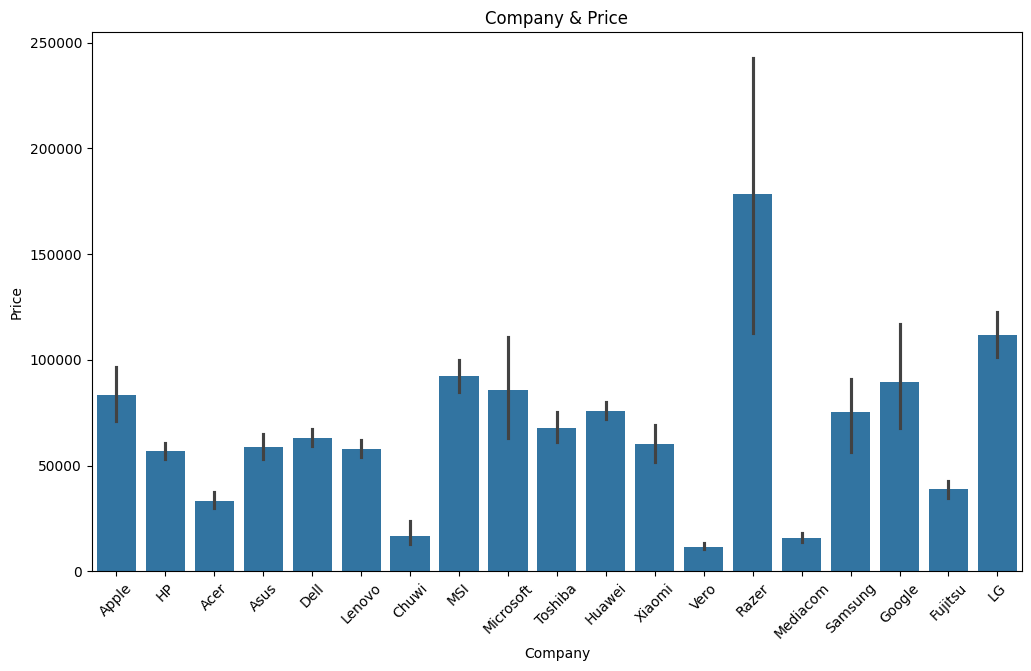

In [143]:
plt.figure(figsize = (12, 7))
sns.barplot(x = "Company", y = "Price", data = df)
plt.title("Company & Price")
plt.xticks(rotation = 45)
plt.show()
plt.show()

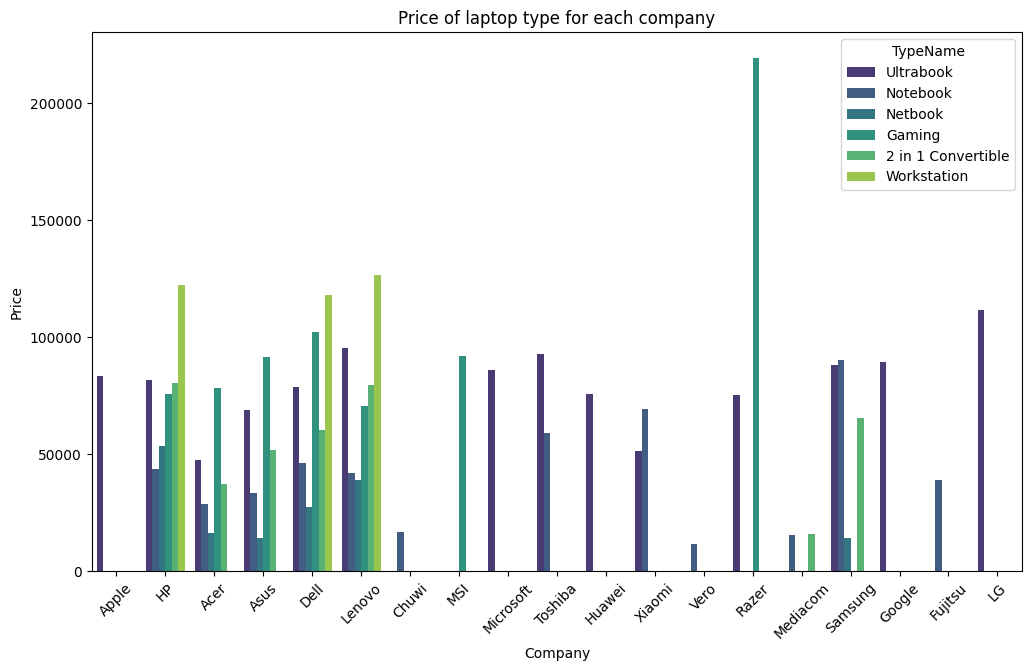

In [144]:
plt.figure(figsize = (12, 7))
sns.barplot(x = "Company", y = "Price", data = df, errorbar=None, hue = "TypeName", palette = "viridis")
plt.xticks(rotation = 45)
plt.title("Price of laptop type for each company")
plt.show()

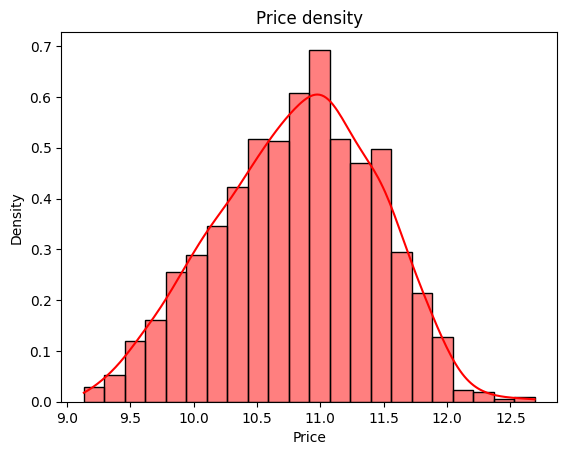

59874.14171519782


In [145]:
sns.histplot(np.log(df["Price"]), kde = True, color = "red", stat= "density")
plt.title("Price density")
plt.show()
print(np.exp(11))

In [146]:
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,Weight,Price
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1.34kg,47895.5232
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,1.5kg,12201.1200
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,2.19kg,40705.9200


In [147]:
def process_memory(memory):
    if "SSD" in memory:
        return int(memory.split(" ")[0].replace("GB", "").replace("TB", "000"))
    return 0


In [148]:
priority_order = {"SSD": 3, "Flash Storage": 2, "HDD": 1}

In [149]:
def clean_memory(memory):
    matches = re.findall(r'(\d+)(GB|TB)?\s*(SSD|HDD|Flash Storage)?', memory)
    memory_list = []
    for size, unit, storage_type in matches:
        size = int(size) * (1024 if unit == "TB" else 1)  # تحويل TB إلى GB
        priority = priority_order.get(storage_type, 0)  # تحديد الأولوية
        memory_list.append((size, priority))
    if not memory_list:
        return 0  # في حالة عدم العثور على أي بيانات
    memory_list.sort(key=lambda x: (-x[1], -x[0]))  # ترتيب حسب الأولوية والحجم
    return memory_list[0][0]



In [150]:
df['Memory'] = df['Memory'].astype(str).apply(clean_memory)


print(df)

     Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                       Cpu  Ram  Memory  \
0                     Intel Core i5 2.3GHz    8     128   
1                     Intel Core i5 1.8GHz    8     128   
2               Intel Core i5 7200U 2.5GHz    8     256   
3                     Intel Core i7 2.7GHz   16     512   
4                     Intel Core i5 3.1GHz    8     256   
...                                    ...  ...     ...   
1298            Intel Core i7 6500U 2.5GHz    4     128   

In [151]:
def extract_cpu_speed(cpu):
    speed = cpu.split()[-1].replace("GHz", "")
    return float(speed)


In [152]:
df['Cpu_Speed'] = df['Cpu'].apply(extract_cpu_speed)
df.drop(columns=['Cpu'], inplace=True)

In [153]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [154]:
df

,Company,TypeName,Inches,Ram,Memory,Gpu,Weight,Price,Cpu_Speed
0,Apple,Ultrabook,13.3,8,128,Intel Iris Plus Graphics 640,1.37,71378.6832,2.3
1,Apple,Ultrabook,13.3,8,128,Intel HD Graphics 6000,1.34,47895.5232,1.8
2,HP,Notebook,15.6,8,256,Intel HD Graphics 620,1.86,30636.0000,2.5
3,Apple,Ultrabook,15.4,16,512,AMD Radeon Pro 455,1.83,135195.3360,2.7
4,Apple,Ultrabook,13.3,8,256,Intel Iris Plus Graphics 650,1.37,96095.8080,3.1
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,128,Intel HD Graphics 520,1.80,33992.6400,2.5
1299,Lenovo,2 in 1 Convertible,13.3,16,512,Intel HD Graphics 520,1.30,79866.7200,2.5
1300,Lenovo,Notebook,14.0,2,64,Intel HD Graphics,1.50,12201.1200,1.6
1301,HP,Notebook,15.6,6,1024,AMD Radeon R5 M330,2.19,40705.9200,2.5


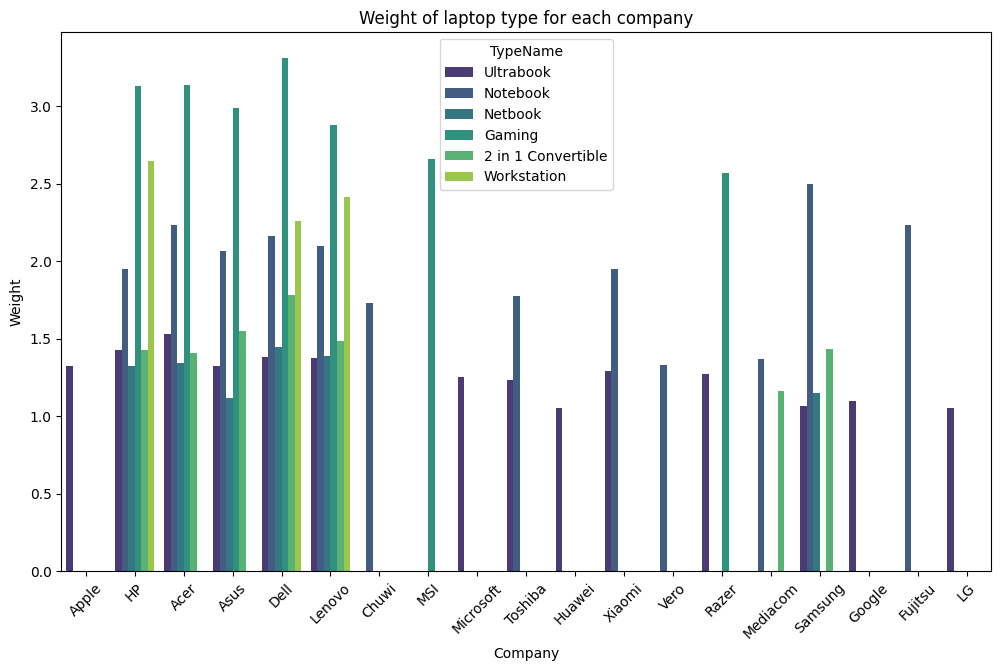

In [155]:
plt.figure(figsize = (12, 7))
sns.barplot(x = "Company", y = "Weight", data = df, errorbar = None,hue = "TypeName" , palette = "viridis")
plt.xticks(rotation = 45)
plt.title("Weight of laptop type for each company")
plt.show()

In [156]:
df.groupby("Company")["Price"].mean().sort_values(ascending = False)

Company
Razer        178282.491429
LG           111834.720000
MSI           92116.226133
Google        89386.080000
Microsoft     85903.788000
Apple         83340.499886
Huawei        75870.720000
Samsung       75308.320000
Toshiba       67549.050000
Dell          63193.755782
Xiaomi        60390.882000
Asus          58830.143878
Lenovo        57882.563200
HP            56891.044222
Fujitsu       38841.120000
Acer          33394.615969
Chuwi         16745.726400
Mediacom      15717.600000
Vero          11584.404000
Name: Price, dtype: float64

In [157]:
label_encoders = {}
categorical_columns = ['Company', 'TypeName', 'Gpu']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [158]:
X = df.drop(columns=['Price'])
y = df['Price']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [161]:
X


,Company,TypeName,Inches,Ram,Memory,Gpu,Weight,Cpu_Speed
0,1,4,13.3,8,128,58,1.37,2.3
1,1,4,13.3,8,128,51,1.34,1.8
2,7,3,15.6,8,256,53,1.86,2.5
3,1,4,15.4,16,512,9,1.83,2.7
4,1,4,13.3,8,256,59,1.37,3.1
...,...,...,...,...,...,...,...,...
1298,10,0,14.0,4,128,47,1.80,2.5
1299,10,0,13.3,16,512,47,1.30,2.5
1300,10,3,14.0,2,64,40,1.50,1.6
1301,7,3,15.6,6,1024,21,2.19,2.5


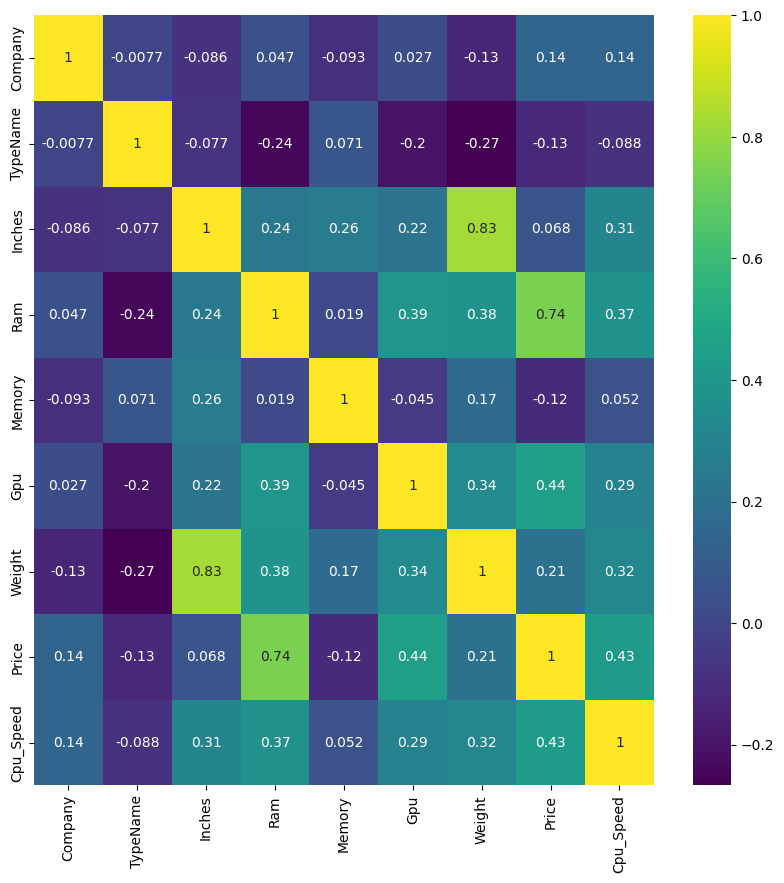

In [162]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, fmt = ".2g", cmap = "viridis")
plt.show()

In [163]:
model = RandomForestRegressor(n_estimators=90 ,random_state=5)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=90, random_state=5)

In [164]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [165]:

print(f"R2 Score: {r2}")

R2 Score: 0.8202823463353501
